# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
import config_from_pydata_env

weather_api_key = config_from_pydata_env.weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url for openweather api
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# empty lists to hold query information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# loop through list of cities and request information
count = 0
set = 1
for city in cities:
    count = count + 1
    # using sleep here to not reach api limit
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
    continue
print("Data Retrieval Complete")

Processing Record 1 of Set 1 | taltal
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | aswan
Processing Record 6 of Set 1 | vila do maio
Processing Record 7 of Set 1 | husavik
Processing Record 8 of Set 1 | marau
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | vestmannaeyjar
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | katsuura
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | kerrville
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | san quintin
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | jiblah
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | vanderhoof
Processing Record 24 of

Processing Record 41 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 42 of Set 4 | sisophon
Processing Record 43 of Set 4 | villanueva de la serena
Processing Record 44 of Set 4 | sao mateus
Processing Record 45 of Set 4 | progreso
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | naze
Processing Record 48 of Set 4 | salou
Processing Record 49 of Set 4 | mar del plata
Processing Record 50 of Set 4 | bolshoye selo
Processing Record 1 of Set 5 | faya
Processing Record 2 of Set 5 | camacha
Processing Record 3 of Set 5 | san cristobal
Processing Record 4 of Set 5 | yulara
Processing Record 5 of Set 5 | tuatapere
Processing Record 6 of Set 5 | west valley city
Processing Record 7 of Set 5 | correntina
Processing Record 8 of Set 5 | vaini
Processing Record 9 of Set 5 | fergus falls
Processing Record 10 of Set 5 | desaguadero
Processing Record 11 of Set 5 | canton
Processing Record 12 of Set 5 | batsfjord
Processing Record 13 of Set 5 | nizhneyansk
City 

Processing Record 27 of Set 8 | zatoka
Processing Record 28 of Set 8 | dingle
Processing Record 29 of Set 8 | satwas
Processing Record 30 of Set 8 | balagansk
Processing Record 31 of Set 8 | marawi
Processing Record 32 of Set 8 | sept-iles
Processing Record 33 of Set 8 | tukrah
Processing Record 34 of Set 8 | fortuna
Processing Record 35 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 36 of Set 8 | celestun
Processing Record 37 of Set 8 | bargal
City not found. Skipping...
Processing Record 38 of Set 8 | nantucket
Processing Record 39 of Set 8 | chardara
Processing Record 40 of Set 8 | novoseleznevo
Processing Record 41 of Set 8 | surt
Processing Record 42 of Set 8 | luwuk
Processing Record 43 of Set 8 | san vicente
Processing Record 44 of Set 8 | inhambane
Processing Record 45 of Set 8 | port macquarie
Processing Record 46 of Set 8 | clarence town
Processing Record 47 of Set 8 | jining
Processing Record 48 of Set 8 | black forest
Processing Record 49 of Set 8 

Processing Record 16 of Set 12 | port hardy
Processing Record 17 of Set 12 | sal rei
Processing Record 18 of Set 12 | altagracia de orituco
Processing Record 19 of Set 12 | mahibadhoo
Processing Record 20 of Set 12 | urucara
Processing Record 21 of Set 12 | dabat
Processing Record 22 of Set 12 | labuhan
Processing Record 23 of Set 12 | mount isa
Processing Record 24 of Set 12 | garoua boulai
Processing Record 25 of Set 12 | kargasok
Processing Record 26 of Set 12 | khandyga
Processing Record 27 of Set 12 | kindu
Processing Record 28 of Set 12 | lolua
City not found. Skipping...
Processing Record 29 of Set 12 | arrecife
Processing Record 30 of Set 12 | ngunguru
Processing Record 31 of Set 12 | rawson
Processing Record 32 of Set 12 | morehead
Processing Record 33 of Set 12 | verdun
Processing Record 34 of Set 12 | aklavik
Processing Record 35 of Set 12 | samarai
Processing Record 36 of Set 12 | san carlos de bariloche
Processing Record 37 of Set 12 | longyearbyen
Processing Record 38 of 

In [5]:
len(lat)

600

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# convert raw data to dataframe
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# drop cities that were skipped because they could not be found by the api
city_weather_df = city_weather_df.dropna(how="any")

In [7]:
# export the city data into a .csv file within a folder named output_data
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# display the dataframe
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taltal,-25.40,-70.48,66.58,52.0,15.0,5.17,CL,1.603210e+09
1,jamestown,42.10,-79.24,48.99,100.0,90.0,6.93,US,1.603210e+09
2,georgetown,5.41,100.34,84.20,83.0,40.0,2.24,MY,1.603210e+09
3,port alfred,-33.59,26.89,63.57,64.0,82.0,19.75,ZA,1.603210e+09
4,aswan,24.09,32.91,88.92,13.0,0.0,4.34,EG,1.603210e+09
...,...,...,...,...,...,...,...,...,...
594,zeya,53.75,127.27,34.29,89.0,100.0,8.03,RU,1.603210e+09
595,upata,8.01,-62.40,88.23,52.0,31.0,6.55,VE,1.603210e+09
597,maraa,-1.83,-65.37,94.10,45.0,91.0,3.80,BR,1.603210e+09
598,lingao,19.91,109.69,74.14,80.0,89.0,12.53,CN,1.603210e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

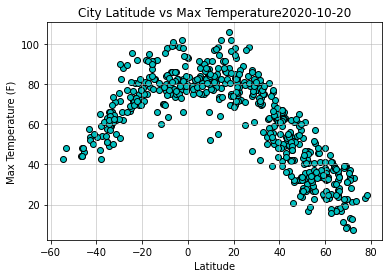

In [10]:
# set date time variable for title
date_time = datetime.date(datetime.now())

# create latitude vs temperature scatter plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], facecolor = "c", edgecolor = "k")

# set title
plt.title(f"City Latitude vs Max Temperature{date_time}")

# set x axis label
plt.xlabel("Latitude")

# set y axis label
plt.ylabel("Max Temperature (F)")

# set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/city_latitude_temperature.png")

# show the scatterplot
plt.show()

## Latitude vs. Humidity Plot

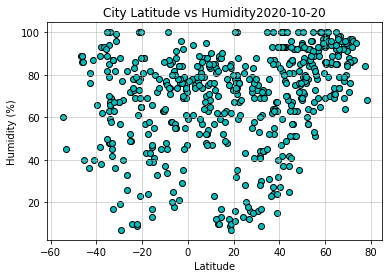

In [11]:
# create latitude vs humidity scatter plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], facecolor = "c", edgecolor = "k")

# set title
plt.title(f"City Latitude vs Humidity{date_time}")

# set x axis label
plt.xlabel("Latitude")

# set y axis label
plt.ylabel('Humidity (%)')

# set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/city_latitude_humidity.png")

# show the scatterplot
plt.show()

## Latitude vs. Cloudiness Plot

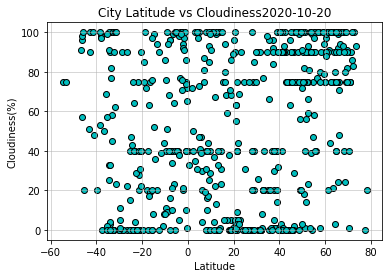

In [12]:
# create latitude vs cloudiness scatter plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], facecolor = "c", edgecolor = "k")

# set title
plt.title(f"City Latitude vs Cloudiness{date_time}")

# set x axis label
plt.xlabel("Latitude")

# set y axis label
plt.ylabel('Cloudiness(%)')

# set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/city_latitude_cloudiness.png")

# show the scatterplot
plt.show()

## Latitude vs. Wind Speed Plot

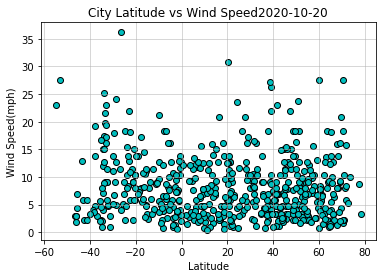

In [13]:
# create latitude vs wind speed scatter plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], facecolor = "c", edgecolor = "k")

# set title
plt.title(f"City Latitude vs Wind Speed{date_time}")

# set x axis label
plt.xlabel("Latitude")

# set y axis label
plt.ylabel('Wind Speed(mph)')

# set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/city_latitude_wind_speed.png")

# show the scatterplot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression